DATA SCIENCE NIGERIA STUDENT ACADEMIC PERFORMANCE PREDICTION DATASETS -  This data captures performance of randomly selected students. The data attributes include gender, race/ethnicity, parental level of education, lunch, test preparation, course, math score, reading score, writing score .

# Importing the required libraries

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("StudentsPerformance.csv")

In [3]:
# view of top five rows 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#view of last five rows
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
#view of shape of df
df.shape

(1000, 8)

In [7]:
#print of columns of df
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
#print of statastical information of df
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
#print of some info of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
#print of variance
df.var()

math score       229.918998
reading score    213.165605
writing score    230.907992
dtype: float64

In [12]:
#print of corr matrx
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [13]:
#checking of null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

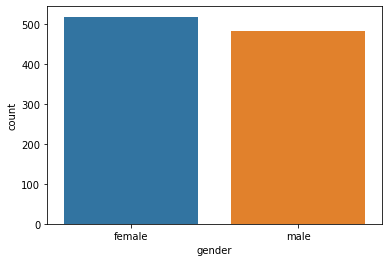

In [16]:
#count plot
sns.countplot(x='gender',data=df)

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

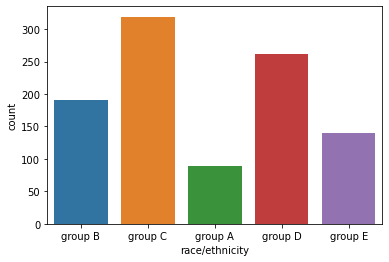

In [17]:
sns.countplot(x='race/ethnicity',data=df)

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

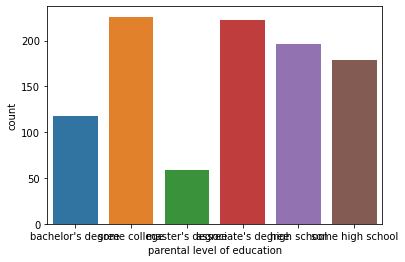

In [18]:
sns.countplot(x='parental level of education',data=df)

<AxesSubplot:xlabel='lunch', ylabel='count'>

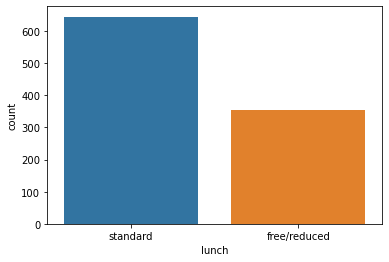

In [19]:
sns.countplot(x='lunch',data=df)

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

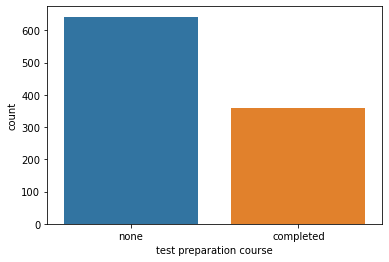

In [20]:
sns.countplot(x='test preparation course',data=df)

<AxesSubplot:xlabel='math score', ylabel='count'>

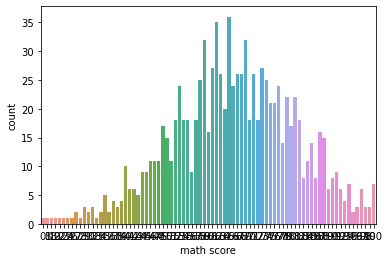

In [21]:
sns.countplot(x='math score',data=df)

<AxesSubplot:xlabel='reading score', ylabel='count'>

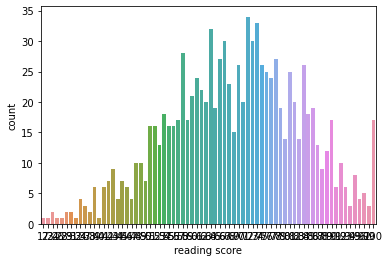

In [22]:
sns.countplot(x='reading score',data=df)

<AxesSubplot:xlabel='writing score', ylabel='count'>

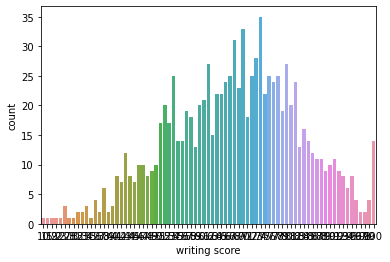

In [23]:
sns.countplot(x='writing score',data=df)

<AxesSubplot:>

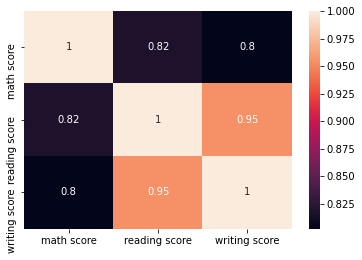

In [26]:
# constructing a heatmap
correlation = df.corr()
sns.heatmap(correlation,annot=True)

In [27]:
cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course']

In [32]:
for col in cols:
    le = preprocessing.LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [42]:
#splitting of dataset
Y = df['math score']
X = df.drop('math score',axis=1)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Random forest regressor

- A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [44]:
# Random forest Regressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [46]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8097270525692997


In [54]:
rfc = RandomForestClassifier(random_state = 42)
cv_scores = cross_val_score(rfc, X, Y, cv=5)
scores['RandomForest'] = np.mean(cv_scores)
print(f"Random Forest Score : {np.mean(cv_scores)}")

C:\Users\deept\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Random Forest Score : 0.046


Logistic regression

- Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [47]:
model=LogisticRegression()

In [48]:
model.fit(X_train,Y_train)

C:\Users\deept\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
x_train_prediction =model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction, Y_train)

In [50]:
print("accuracy score for training data : ",training_data_accuracy)

accuracy score for training data :  0.05125


Decision Trees

- Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter.

In [51]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train,Y_train)
y_pred=clf_entropy.predict(X_test)

In [52]:
accuracy_score(Y_test,y_pred)

0.035

# Conclusion:
Out of the above three models, logistic regression has the highest accuracy.
Hence, we choose the model with highest accuracy.

In [55]:
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[46.01       68.8        84.84       61.68       69.24       46.52
 62.63       81.88       69.81       46.18       62.97       62.14
 72.85       63.3        45.81       54.26       51.36       33.41
 66.7        65.83       56.04       66.04       50.47       70.54
 60.95       66.27       71.         54.99       58.14       81.67
 58.91       81.02666667 75.57       46.3        63.83       85.2
 71.99       66.         91.87166667 57.77       76.32       63.3
 81.67       67.54       54.48       84.39       23.83       93.66
 47.3        49.03       66.39       75.2        76.6        65.35
 65.22       67.39       87.37       63.09       88.4        64.12
 39.75       56.27       71.92       45.99       71.47       56.47
 60.14       73.06       20.16666667 74.25       57.42       80.15
 71.69       60.7        70.12       83.93666667 74.15       65.18
 70.93       63.69       61.36       76.43       63.01       85.2
 73.61       55.45       58.22       74.42       65.27       64.8